In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn
import random
import warnings


import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel, ldamodel

from topic_modeler import TopicModeler

# Notebook settings
random.seed(123)
pd.set_option('display.max_colwidth', None)
#warnings.filterwarnings('ignore') # import warnings

/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Table of Contents

* [Steps performed before this notebook](http://localhost:8888/notebooks/topic_modeling.ipynb#Steps-performed-before-this-notebook)
* [Model Search (LDA)](http://localhost:8888/notebooks/topic_modeling.ipynb#Model-Search)
    * [Begin with a small corpus, and unigrams](http://localhost:8888/notebooks/topic_modeling.ipynb#Begin-with-a-small-corpus,-and-unigrams)
    * [Compare to n-grams (small corpus)](http://localhost:8888/notebooks/topic_modeling.ipynb#Compare-to-ngrams-(small-dataset))
    * [Increase size of corpus used for fitting](http://localhost:8888/notebooks/topic_modeling.ipynb#Increase-the-size-of-the-corpus-used-for-fitting)
    * [Fit model on complete corpus](http://localhost:8888/notebooks/topic_modeling.ipynb#Fit-model-on-complete-corpus)
* [Explore selected model](http://localhost:8888/notebooks/topic_modeling.ipynb#Explore-selected-model)
    * [Visualization](http://localhost:8888/notebooks/topic_modeling.ipynb#Visualization)
* [Alternative Approach: doc2vec](http://localhost:8888/notebooks/topic_modeling.ipynb#Alternative-Approach:-doc2vec)

# Model Search

To start with, we will explore fitting latent dirichlet allocation on a small dataset. Later, we'll fit the models on larger datasets and compare the coherence (we expect it to increase with the dataset size, at least up to a point).

## Begin with a small corpus, and unigrams

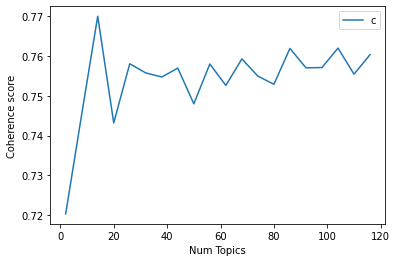

In [3]:
mod = TopicModeler('preprocessed_input/preprocessed_input_10k_unigrams.json')
mod.set_texts()
mod.set_dictionary()
mod.set_corpus()

start = 2; stop = 120; step = 6
model_list, coherence_values = mod.optimal_model_search(start, stop, step)

mod.plot_model_search_results(coherence_values, start, stop, step)

The coherence value is jumping around. Note the y-axis scale (these differences are very small).

## Compare to ngrams (small dataset)

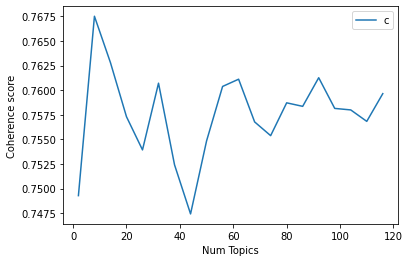

In [4]:
model_list, coherence_values = mod.optimal_model_search(start,stop,step)

mod.plot_model_search_results(coherence_values, start, stop, step)

Overall, coherence is significantly improved when switching from unigrams to n-grams (as found with the "noun chunks" feature of the Spacy library; mostly these are bi/trigrams). However, the model seems to be converging to an optimum of a single topic. 

## Increase the size of the corpus used for fitting

Next, we re-fit the unigram and ngrams models on a larger dataset.

In [ ]:
mod1 = TopicModeler('preprocessed_input/preprocessed_input_500k_unigrams.json')
mod1.set_texts()
mod1.set_dictionary()
mod1.set_corpus()
start = 2; stop=80; step=6
model_list_unigrams, coherence_values = mod1.optimal_model_search(start,stop,step)
print('Results of model search on unigrams:')
mod1.plot_model_search_results(coherence_values, start, stop, step)

mod2 = TopicModeler('preprocessed_input/preprocessed_input_500k_ngrams.json')
mod2.set_texts()
mod2.set_dictionary()
mod2.set_corpus()
model_list_ngrams, coherence_values = mod2.optimal_model_search(start,stop,step)
print('Results of model search on ngrams:')
mod2.plot_model_search_results(coherence_values, start, stop, step)

# Explore selected model

### Summary of unigrams model

In [ ]:
mod1.set_optimal_model(model_list_unigrams, 1)
sent_topics_df, doc_topic_summary = mod1.produce_doc_topic_summary_df()
topic_summary_df = mod1.produce_topic_summary_df(sent_topics_df)
topic_summary_df.head(8)

### Summary of ngrams model:

In [ ]:
mod2.set_optimal_model(model_list_ngrams, 1)
sent_topics_df, doc_topic_summary = mod2.produce_doc_topic_summary_df()
topic_summary_df = mod2.produce_topic_summary_df(sent_topics_df)
topic_summary_df.head(8)

## Visualization

In [ ]:
pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim_models.prepare(mod1.model, mod1.corpus, mod1.dictionary)
viz

In [ ]:
pyLDAvis.enable_notebook()
viz = pyLDAvis.gensim_models.prepare(mod2.model, mod2.corpus, mod2.dictionary)
viz

# Conclusion of LDA exploration

The ngram model, despite having a greater coherence metric, is seperating topics based on very specific technical terms found in the arXiv dataset. For example, "Lipcshitz multiarmed bandit (MAB) problem", "loopy belief propagation algorithm". We see in visualization that virually all of the terms appper only once in the corpus or twice in the corpus.

# Alternative Approach: doc2vec

In [4]:
#from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

mod = TopicModeler('preprocessed_input/preprocessed_input_500k_unigrams.json')
mod.set_texts()

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(mod.texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

In [5]:
print(mod.texts[0])
vector = model.infer_vector(mod.texts[0])
print(vector)

['intelligent', 'acoustic', 'emission', 'locator', 'describe', 'ii', 'discuss', 'blind', 'source', 'separation', 'time', 'delay', 'estimation', 'location', 'simultaneously', 'active', 'continuous', 'acoustic', 'emission', 'source', 'location', 'acoustic', 'emission', 'complicated', 'aircraft', 'frame', 'structure', 'difficult', 'problem', 'non', 'destructive', 'testing', 'article', 'describe', 'intelligent', 'acoustic', 'emission', 'source', 'locator', 'intelligent', 'locator', 'comprise', 'sensor', 'antenna', 'general', 'regression', 'neural', 'network', 'solve', 'location', 'problem', 'base', 'learn', 'example', 'locator', 'performance', 'test', 'different', 'test', 'specimen', 'test', 'show', 'accuracy', 'location', 'depend', 'sound', 'velocity', 'attenuation', 'speciman', 'dimension', 'test', 'area', 'property', 'store', 'datum', 'location', 'accuracy', 'achieve', 'intelligent', 'locator', 'comparable', 'obtain', 'conventional', 'triangulation', 'method', 'applicability', 'intellig

In [6]:
len(mod.texts)

9968

In [7]:
train_corpus = documents
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus)):
    inferred_vector = model.infer_vector(train_corpus[doc_id].words)
    sims = model.dv.most_similar([inferred_vector], topn=len(model.dv))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])
    
import collections

counter = collections.Counter(ranks)
print(counter)

Counter({0: 761, 1: 593, 2: 433, 3: 392, 4: 356, 5: 294, 6: 259, 7: 256, 8: 215, 10: 213, 9: 191, 11: 177, 12: 169, 13: 163, 14: 157, 16: 135, 15: 133, 21: 114, 17: 113, 20: 111, 22: 104, 18: 104, 19: 93, 25: 91, 23: 90, 30: 84, 24: 79, 29: 74, 26: 72, 27: 69, 34: 68, 31: 67, 35: 66, 33: 65, 36: 63, 38: 62, 28: 62, 32: 61, 37: 57, 42: 55, 40: 53, 41: 53, 48: 51, 44: 48, 43: 47, 45: 44, 55: 43, 39: 43, 53: 43, 51: 43, 46: 42, 49: 40, 50: 37, 47: 36, 62: 36, 65: 35, 66: 34, 54: 33, 64: 31, 56: 31, 60: 30, 67: 29, 61: 29, 57: 28, 81: 27, 63: 27, 75: 26, 71: 26, 58: 26, 59: 25, 110: 25, 52: 25, 68: 24, 88: 24, 74: 24, 90: 23, 95: 23, 70: 23, 94: 23, 79: 22, 92: 21, 85: 21, 77: 21, 103: 19, 69: 19, 117: 19, 73: 19, 98: 18, 83: 18, 72: 18, 102: 18, 84: 18, 86: 17, 105: 17, 78: 17, 96: 17, 76: 16, 111: 16, 127: 16, 93: 16, 146: 16, 82: 15, 142: 14, 114: 14, 89: 14, 107: 14, 136: 14, 138: 14, 126: 14, 101: 14, 133: 13, 122: 13, 80: 13, 100: 13, 109: 13, 99: 12, 128: 12, 147: 12, 87: 12, 144: 1

In [8]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Document (9967): «recent work generative discriminative score log likelihood ratio calibration show linear transform good accuracy limited range operating point method required tailoring calibration train objective function order target desire region good accuracy generalize linear recipe non linear one experiment non linear non parametric discriminative pav solution parametric generative maximum likelihood solution use gaussian student t normal inverse gaussian score distribution experiment nist score suggest non linear method provide wide range optimal accuracy train have resort objective function tailoring comparison linear non linear calibration speaker recognition machine learning»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d5,n5,w2,s0.001,t4):

MOST (8088, 0.9995353817939758): «paper present novel algorithm base dependent dirichlet process mixture model ddpmm cluster batch sequential datum contain unknown number evolve cluster algorithm derive low variance asymptotic analysi